In [104]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_classification
%matplotlib inline

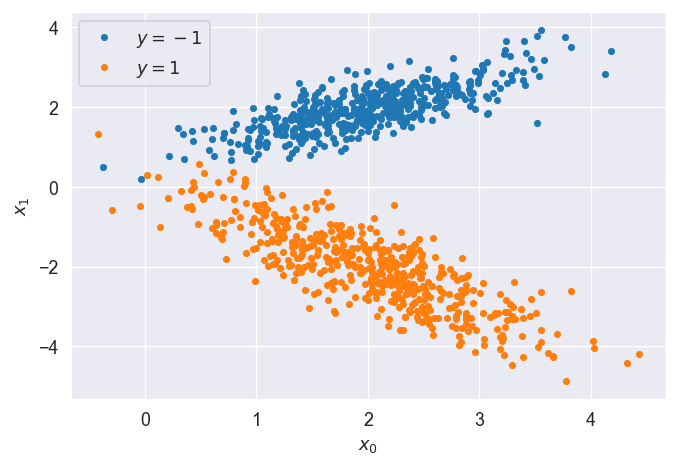

In [138]:
FIGURE_RESOLUTION = 128
plt.rcParams['figure.dpi'] = FIGURE_RESOLUTION

def create_toy_data(n_samples=1000, class_sep=2):
    X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                               n_redundant=0, n_clusters_per_class=1, flip_y=0,
                               class_sep=class_sep, random_state=1)
    Y[Y==0] = -1 # encode "negative" class using -1 rather than 0
    plt.plot(X[Y==-1,0], X[Y==-1,1], ".", label="$y = -1$")
    plt.plot(X[Y==1,0], X[Y==1,1], ".", label="$y = 1$")
    plt.legend()
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.show()

    return X,Y

X_train, Y_train = create_toy_data(class_sep=2)

In [139]:
class Perceptron(nn.Module):
    """ A Perceptron is one Linear layer """

    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """The forward pass of the MLP

        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, input_dim)
        Returns:
            the resulting tensor. tensor.shape should be (batch, 1)
        """
        return torch.sigmoid(self.fc1(x_in))

In [140]:
perceptron = Perceptron(input_dim=2)
optimizer = optim.Adam(params=perceptron.parameters(), lr=0.1)
bce_loss = nn.BCELoss()
epoch=5
n_batches = 5
X_train =  torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)


for _ in range(n_batches):
    optimizer.zero_grad()
    y_pred = perceptron(X_train).squeeze()
    loss = bce_loss(y_pred, Y_train)
    loss.backward()
    optimizer.step()

In [141]:
for i in perceptron.named_parameters():
    print(i)

('fc1.weight', Parameter containing:
tensor([[-0.6679, -0.6288]], requires_grad=True))
('fc1.bias', Parameter containing:
tensor([-0.5914], requires_grad=True))


In [142]:
perceptron.fc1.weight

Parameter containing:
tensor([[-0.6679, -0.6288]], requires_grad=True)

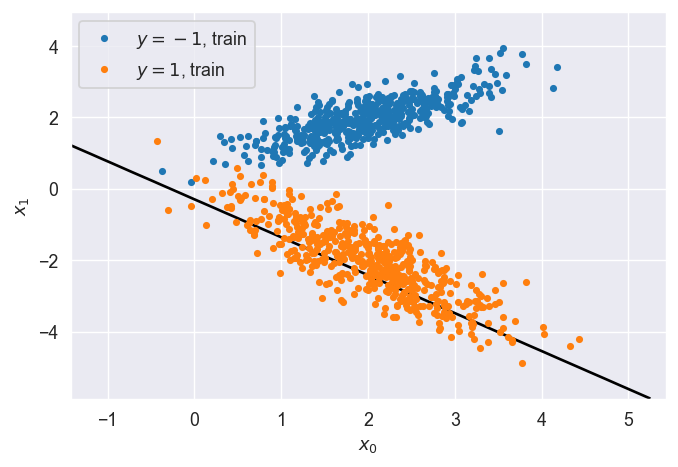

In [143]:
def plot_results(X_train, Y_train):
    
    
    linestyles=[ '-']
    X_train = X_train.numpy()
    Y_train = Y_train.numpy()
    # Plot training set
    plt.plot(X_train[Y_train==-1,0], X_train[Y_train==-1,1], ".", label=r"$y=-1$, train")
    plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], ".", label=r"$y=1$, train")
    plt.gca().set_prop_cycle(None) # reset colour cycle


    # Compute axes limits
    border = 1
    x0_lower = X_train[:,0].min() - border
    x0_upper =X_train[:,0].max() + border
    x1_lower = X_train[:,1].min() - border
    x1_upper = X_train[:,1].max() + border

    xx = np.linspace(x0_lower,x0_upper, 30)
    yy = np.linspace(x1_lower, x1_upper, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # Generate grid over feature space
    #resolution = 0.01
    #x0, x1 = np.mgrid[x0_lower:x0_upper:resolution, x1_lower:x1_upper:resolution]
    #grid = np.c_[x0.ravel(), x1.ravel()]
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)

    #Z = perceptron(torch.tensor(grid, dtype=torch.float32)).detach().numpy().reshape(x1.shape)
    
    # Plot decision boundary (where s(x) == 0)等高线
    #plt.contour(x0, x1, Z, levels=[0], cmap="Greys", vmin=-0.2, vmax=0.2)
    plt.contour(XX, YY, Z, colors='k', levels=[ 0.4], linestyles=linestyles)    

    plt.legend()
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.show()
    
plot_results(X_train, Y_train)

In [153]:
for _ in range(2000):
    optimizer.zero_grad()
    y_pred = perceptron(X_train).squeeze()
    loss = bce_loss(y_pred, Y_train)
    loss.backward()
    optimizer.step()

In [154]:
for i in perceptron.named_parameters():
    print(i)

('fc1.weight', Parameter containing:
tensor([[ -3.6158, -31.6675]], requires_grad=True))
('fc1.bias', Parameter containing:
tensor([3.1577], requires_grad=True))


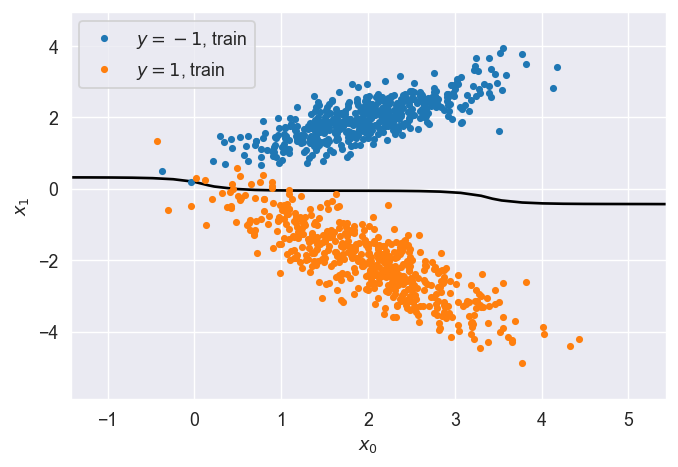

In [155]:
def plot_results(X_train, Y_train):
    
    
    linestyles=[ '-']
    X_train = X_train.numpy()
    Y_train = Y_train.numpy()
    # Plot training set
    plt.plot(X_train[Y_train==-1,0], X_train[Y_train==-1,1], ".", label=r"$y=-1$, train")
    plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], ".", label=r"$y=1$, train")
    plt.gca().set_prop_cycle(None) # reset colour cycle


    # Compute axes limits
    border = 1
    x0_lower = X_train[:,0].min() - border
    x0_upper =X_train[:,0].max() + border
    x1_lower = X_train[:,1].min() - border
    x1_upper = X_train[:,1].max() + border

    xx = np.linspace(x0_lower,x0_upper, 30)
    yy = np.linspace(x1_lower, x1_upper, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # Generate grid over feature space
    #resolution = 0.01
    #x0, x1 = np.mgrid[x0_lower:x0_upper:resolution, x1_lower:x1_upper:resolution]
    #grid = np.c_[x0.ravel(), x1.ravel()]
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)

    #Z = perceptron(torch.tensor(grid, dtype=torch.float32)).detach().numpy().reshape(x1.shape)
    
    # Plot decision boundary (where s(x) == 0)等高线
    #plt.contour(x0, x1, Z, levels=[0], cmap="Greys", vmin=-0.2, vmax=0.2)
    plt.contour(XX, YY, Z, colors='k', levels=[ 0.4], linestyles=linestyles)    

    plt.legend()
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.show()
    
plot_results(X_train, Y_train)